In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


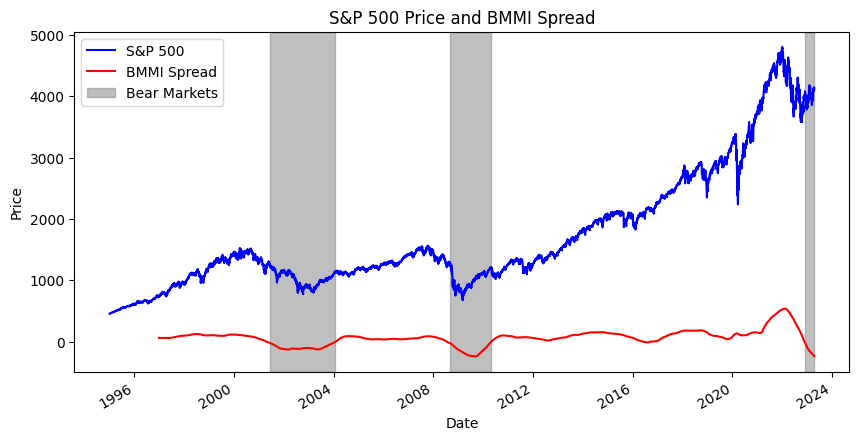

In [14]:
# Download historical price data for the S&P 500
start_date = '1995-01-01'
end_date = '2023-04-16'
sp500_data = yf.download('^GSPC', start=start_date, end=end_date, auto_adjust=True)

# Calculate the 12-month and 24-month moving averages for the S&P 500
sp500_data['S&P 500 12MMA'] = sp500_data['Close'].rolling(window=252).mean()
sp500_data['S&P 500 24MMA'] = sp500_data['Close'].rolling(window=504).mean()

# Calculate the BMMI spread
sp500_data['BMMI Spread'] = sp500_data['S&P 500 12MMA'] - sp500_data['S&P 500 24MMA']

# Define a function to identify bear markets
def identify_bear_markets(data, threshold=-20):
    bear_markets = []
    in_bear_market = False
    for index, row in data.iterrows():
        if not in_bear_market and row['BMMI Spread'] < threshold:
            in_bear_market = True
            bear_market_start = index
        elif in_bear_market and row['BMMI Spread'] >= 0:
            in_bear_market = False
            bear_market_end = index
            bear_markets.append((bear_market_start, bear_market_end))
    if in_bear_market:
        bear_markets.append((bear_market_start, data.index[-1]))
    return bear_markets

# Identify bear markets in the data
bear_markets = identify_bear_markets(sp500_data)

# Create a line chart showing the S&P 500 price and the BMMI spread, with bear markets marked in gray
fig, ax = plt.subplots(figsize=(10, 5))
sp500_data['Close'].plot(ax=ax, color='blue')
sp500_data['BMMI Spread'].plot(ax=ax, color='red')
ax.set_ylabel('Price')
ax.set_title('S&P 500 Price and BMMI Spread')
ax.legend()

# Mark bear markets on the graph
for start, end in bear_markets:
    ax.axvspan(start, end, color='gray', alpha=0.5)

ax.legend(['S&P 500', 'BMMI Spread', 'Bear Markets'])
plt.show()